In [1]:
import json
import pandas as pd
from pathlib import Path 
import plot_utils
import matplotlib.pyplot as plt


from importlib import reload
reload(plot_utils)

plot_utils.set_style()

ftype = '.pdf'
save_dir = Path('figs_amd')
save_dir.mkdir(exist_ok=True)

## AMD Case Study

In [71]:
def double_line_plot(x, y1, y2, label1=None, label2=None, color1='blue', color2='red', xlabel='time (s)', size=[1.5,1.5]):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(label1, color=color1)
    line1, = ax1.plot(x, y1, color=color1)  # Removed marker
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.grid(linewidth=0.5)

    ax2 = ax1.twinx()  
    ax2.set_ylabel(label2, color=color2)  
    line2, = ax2.plot(x, y2, color=color2)  # Removed marker
    ax2.tick_params(axis='y', labelcolor=color2)

    fig.tight_layout() 
    plot_utils.set_size(size[0], size[1], ax=ax1) 
    plot_utils.set_size(size[0], size[1],ax=ax2)
    
    # Added legend
    return fig

In [72]:
df = plot_utils.df_from_dir(Path('../results/amd'))
df = df.sort_values('Reward Weight')
df.head()

,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Reward Weight,Starting Material Weight,Reaction Weight
0,0,0.000000,0.000000,90.769231,1,0.0,0,NaN,1.0,1.0,1.0
11,4,0.033058,2.384615,90.769231,5,3.7,0,NaN,2.0,1.0,1.0
13,15,0.123967,9.846154,90.769231,13,13.1,10,0.975691,3.0,1.0,1.0
14,31,0.256198,21.230769,90.769231,24,35.7,25,0.944177,4.0,1.0,1.0
15,34,0.280992,24.000000,90.769231,28,43.6,30,0.953073,5.0,1.0,1.0


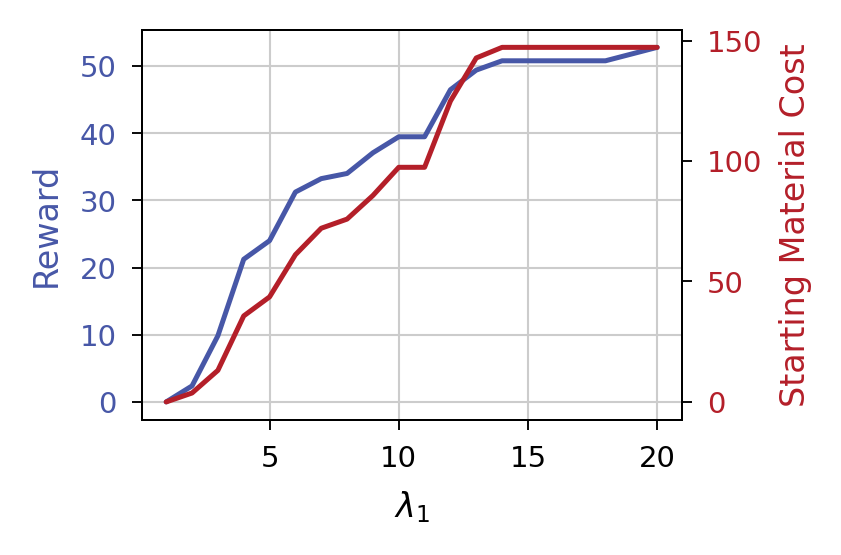

In [73]:
fig = double_line_plot(df['Reward Weight'], df['Total reward'], df['Cost starting materials'], 
                 label1='Reward', label2='Starting Material Cost', xlabel='$\\lambda_1$',
                 color1='#4757A7', color2='#B41F29', size=[1.8, 1.3])
fig.savefig(save_dir/f'reward_cost{ftype}',bbox_inches='tight', dpi=200, transparent=True)

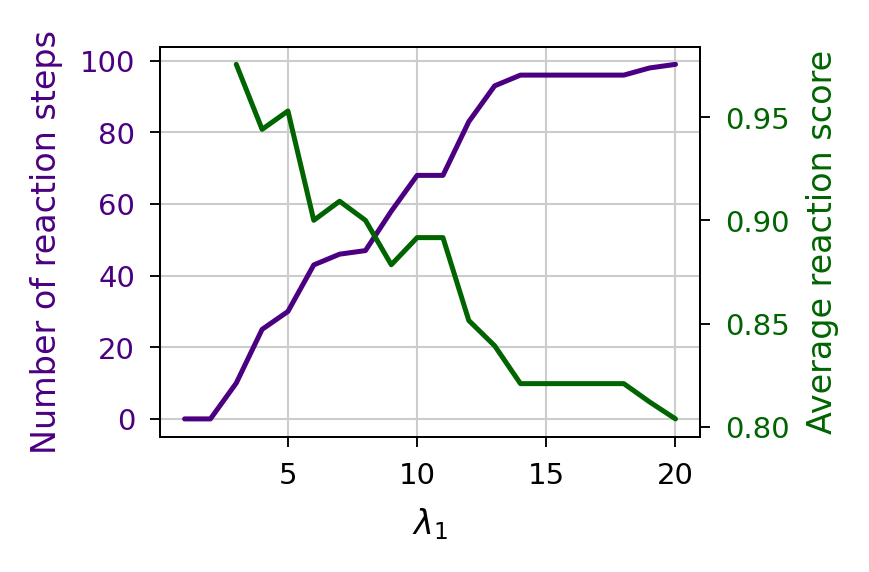

In [74]:
fig = double_line_plot(df['Reward Weight'], df['Number reaction steps'], df['Average reaction score'], 
                 label1='Number of reaction steps', label2='Average reaction score', xlabel='$\\lambda_1$',
                 color1='indigo', color2='darkgreen', size=[1.8,1.3])
fig.savefig(save_dir/f'reactions{ftype}',bbox_inches='tight', dpi=200, transparent=True)

## Button Case Study

In [3]:
df = plot_utils.df_from_dir(Path('../results/button_alectinib'))
df


,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Reward Weight,Starting Material Weight,Reaction Weight
0,6,0.027907,2.956522,96.695652,11,12.5,12,0.975938,10.0,1.0,1.0
1,22,0.102326,8.478261,96.695652,38,63.4,39,0.941339,20.0,1.0,1.0
2,36,0.167442,13.826087,96.695652,61,144.8,75,0.906571,30.0,1.0,1.0
3,49,0.227907,21.000000,96.695652,87,243.3,118,0.876934,40.0,1.0,1.0
